In [2]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
housingFilePath = r'D:\Documents\Masters Application\Algoma University\Course Material\COSC5806 - Data Analysis with Python\Project\Data\housing_data.xlsx'
popFilePath = r'D:\Documents\Masters Application\Algoma University\Course Material\COSC5806 - Data Analysis with Python\Project\Data\population_data.csv'
immiFilePath = r'D:\Documents\Masters Application\Algoma University\Course Material\COSC5806 - Data Analysis with Python\Project\Data\immigration_data.csv'
rateFilePath = r'D:\Documents\Masters Application\Algoma University\Course Material\COSC5806 - Data Analysis with Python\Project\Data\interestrate_data.csv'

In [6]:
#read the data and split the date
housingDf = pd.read_excel(housingFilePath, sheet_name="Aggregate")
print(housingDf.head())
housingDf['Date'] = pd.to_datetime(housingDf['Date'])

housingDf['year'] = housingDf['Date'].dt.year
housingDf['month'] = housingDf['Date'].dt.month
housingDf['yearMonth'] = housingDf['Date'].dt.strftime('%Y-%m')
print(housingDf.head())

        Date  Composite_HPI  Single_Family_HPI  One_Storey_HPI  \
0 2005-01-01          100.0              100.0           100.0   
1 2005-02-01          101.0              101.0           101.2   
2 2005-03-01          102.1              102.1           102.4   
3 2005-04-01          103.1              103.2           103.8   
4 2005-05-01          103.8              103.9           104.7   

   Two_Storey_HPI  Townhouse_HPI  Apartment_HPI  Composite_Benchmark  \
0           100.0          100.0          100.0               236400   
1           100.9          100.9          101.2               238800   
2           101.9          101.7          102.2               241300   
3           102.9          102.4          103.1               243800   
4           103.3          103.2          104.1               245400   

   Single_Family_Benchmark  One_Storey_Benchmark  Two_Storey_Benchmark  \
0                   256600                204100                299000   
1                   25

In [8]:
popDf = pd.read_csv(popFilePath)
print(popDf.head())

  REF_DATE     GEO           DGUID      UOM  UOM_ID SCALAR_FACTOR  SCALAR_ID  \
0  2000-01  Canada  2016A000011124  Persons     249         units          0   
1  2000-04  Canada  2016A000011124  Persons     249         units          0   
2  2000-07  Canada  2016A000011124  Persons     249         units          0   
3  2000-10  Canada  2016A000011124  Persons     249         units          0   
4  2001-01  Canada  2016A000011124  Persons     249         units          0   

  VECTOR  COORDINATE     VALUE  STATUS  SYMBOL  TERMINATED  DECIMALS  
0     v1           1  30525872     NaN     NaN         NaN         0  
1     v1           1  30594030     NaN     NaN         NaN         0  
2     v1           1  30685730     NaN     NaN         NaN         0  
3     v1           1  30783969     NaN     NaN         NaN         0  
4     v1           1  30824441     NaN     NaN         NaN         0  


In [10]:
#read the data and split the year
immiDf = pd.read_csv(immiFilePath)
immiDf['yearStart'] = immiDf['REF_DATE'].str.split("/").str[0]
immiDf['yearEnd'] = immiDf['REF_DATE'].str.split("/").str[1]
print(immiDf.head())

    REF_DATE     GEO           DGUID Components of population growth      UOM  \
0  2000/2001  Canada  2016A000011124                          Births  Persons   
1  2001/2002  Canada  2016A000011124                          Births  Persons   
2  2002/2003  Canada  2016A000011124                          Births  Persons   
3  2003/2004  Canada  2016A000011124                          Births  Persons   
4  2004/2005  Canada  2016A000011124                          Births  Persons   

   UOM_ID SCALAR_FACTOR  SCALAR_ID   VECTOR  COORDINATE     VALUE STATUS  \
0     249         units          0  v391069         1.1  327487.0    NaN   
1     249         units          0  v391069         1.1  329131.0    NaN   
2     249         units          0  v391069         1.1  331640.0    NaN   
3     249         units          0  v391069         1.1  339351.0    NaN   
4     249         units          0  v391069         1.1  341833.0    NaN   

   SYMBOL  TERMINATED  DECIMALS yearStart yearEnd  
0   

In [12]:
rateDf = pd.read_csv(rateFilePath)
#consider only bank rate
rateDf = rateDf[rateDf["Financial market statistics"] == "Bank rate"]

#format date and required date related columns
rateDf["REF_DATE"] = pd.to_datetime(rateDf["REF_DATE"],format="%d-%m-%Y")
rateDf["yearMonth"] = rateDf["REF_DATE"].dt.strftime('%Y-%m')
rateDf["year"] = rateDf["REF_DATE"].dt.year
rateDf["month"] = rateDf["REF_DATE"].dt.month

d = {c: 'first' for c in rateDf.columns} ; d['VALUE'] = 'median' 
rateDf = rateDf.groupby('yearMonth', dropna = True).agg(d)
rateDf.reset_index(drop = True, inplace = True)
rateDf

,REF_DATE,GEO,DGUID,Financial market statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,yearMonth,year,month
0,2005-01-01,Canada,2016A000011124,Bank rate,Percent,239,units,0,v39078,1.38,2.75,..,NaN,NaN,3,2005-01,2005,1
1,2005-02-01,Canada,2016A000011124,Bank rate,Percent,239,units,0,v39078,1.38,2.75,..,NaN,NaN,3,2005-02,2005,2
2,2005-03-01,Canada,2016A000011124,Bank rate,Percent,239,units,0,v39078,1.38,2.75,..,NaN,NaN,3,2005-03,2005,3
3,2005-04-01,Canada,2016A000011124,Bank rate,Percent,239,units,0,v39078,1.38,2.75,..,NaN,NaN,3,2005-04,2005,4
4,2005-05-01,Canada,2016A000011124,Bank rate,Percent,239,units,0,v39078,1.38,2.75,..,NaN,NaN,3,2005-05,2005,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2024-08-01,Canada,2016A000011124,Bank rate,Percent,239,units,0,v39078,1.38,4.75,..,NaN,NaN,3,2024-08,2024,8
236,2024-09-01,Canada,2016A000011124,Bank rate,Percent,239,units,0,v39078,1.38,4.50,..,NaN,NaN,3,2024-09,2024,9
237,2024-10-01,Canada,2016A000011124,Bank rate,Percent,239,units,0,v39078,1.38,4.50,..,NaN,NaN,3,2024-10,2024,10
238,2024-11-01,Canada,2016A000011124,Bank rate,Percent,239,units,0,v39078,1.38,4.00,..,NaN,NaN,3,2024-11,2024,11


In [14]:
rateHousingDf = rateDf[['REF_DATE','yearMonth','GEO','VALUE']].copy()

rateHousingDf = rateHousingDf.merge(housingDf[["yearMonth", "Composite_Benchmark"]], left_on='yearMonth', right_on='yearMonth', copy = True)
rateHousingDf

,REF_DATE,yearMonth,GEO,VALUE,Composite_Benchmark
0,2005-01-01,2005-01,Canada,2.75,236400
1,2005-02-01,2005-02,Canada,2.75,238800
2,2005-03-01,2005-03,Canada,2.75,241300
3,2005-04-01,2005-04,Canada,2.75,243800
4,2005-05-01,2005-05,Canada,2.75,245400
...,...,...,...,...,...
235,2024-08-01,2024-08,Canada,4.75,717800
236,2024-09-01,2024-09,Canada,4.50,713200
237,2024-10-01,2024-10,Canada,4.50,707700
238,2024-11-01,2024-11,Canada,4.00,707100


In [26]:
popHousingDf = popDf[['REF_DATE','GEO','VALUE']].copy()

popHousingDf = popHousingDf[popHousingDf["GEO"] == "Canada"]
popHousingDf = popHousingDf.loc[popHousingDf['REF_DATE'].eq('2005-01').idxmax():popHousingDf['REF_DATE'].eq('2024-10').idxmax()]
print(popHousingDf)
print(housingDf)

#print(housingDf[housingDf["yearMonth"].isin(popHousingDf["REF_DATE"])]["Composite_Benchmark"])
popHousingDf['HousePrice'] = housingDf[housingDf["yearMonth"].isin(popHousingDf["REF_DATE"])]["Composite_Benchmark"]

popHousingDf = popHousingDf.merge(housingDf[["yearMonth", "Composite_Benchmark"]], left_on='REF_DATE', right_on='yearMonth', copy = True)
print(popHousingDf)

   REF_DATE     GEO     VALUE
20  2005-01  Canada  32075011
21  2005-04  Canada  32140569
22  2005-07  Canada  32242732
23  2005-10  Canada  32353311
24  2006-01  Canada  32394909
..      ...     ...       ...
95  2023-10  Canada  40513781
96  2024-01  Canada  40784356
97  2024-04  Canada  41038370
98  2024-07  Canada  41288599
99  2024-10  Canada  41465298

[80 rows x 3 columns]
          Date  Composite_HPI  Single_Family_HPI  One_Storey_HPI  \
0   2005-01-01          100.0              100.0           100.0   
1   2005-02-01          101.0              101.0           101.2   
2   2005-03-01          102.1              102.1           102.4   
3   2005-04-01          103.1              103.2           103.8   
4   2005-05-01          103.8              103.9           104.7   
..         ...            ...                ...             ...   
236 2024-09-01          301.7              307.8           302.2   
237 2024-10-01          299.4              305.2           300.4   
238 2

In [28]:
immiHousingDf = immiDf[["yearStart", "GEO", "Components of population growth", "VALUE"]]
immiHousingDf = immiHousingDf[immiHousingDf["GEO"]=="Canada"]
immiHousingDf = immiHousingDf[immiHousingDf["Components of population growth"] == "Immigrants"]
immiHousingDf.yearStart = pd.to_numeric(immiHousingDf.yearStart, errors='coerce')
immiHousingDf = immiHousingDf[immiHousingDf["yearStart"] > 2004]
immiHousingDf

immiHousingDf = immiHousingDf.merge(housingDf[["year","Composite_Benchmark","month"]], left_on = "yearStart", right_on= "year")
immiHousingDf = immiHousingDf.drop(immiHousingDf[immiHousingDf.month>1].index)
immiHousingDf

,yearStart,GEO,Components of population growth,VALUE,year,Composite_Benchmark,month
0,2005,Canada,Immigrants,254381.0,2005,236400,1
12,2006,Canada,Immigrants,238127.0,2006,258600,1
24,2007,Canada,Immigrants,249632.0,2007,290100,1
36,2008,Canada,Immigrants,245313.0,2008,318900,1
48,2009,Canada,Immigrants,270635.0,2009,294900,1
60,2010,Canada,Immigrants,259143.0,2010,325800,1
72,2011,Canada,Immigrants,260043.0,2011,334300,1
84,2012,Canada,Immigrants,263115.0,2012,360500,1
96,2013,Canada,Immigrants,267936.0,2013,363700,1
108,2014,Canada,Immigrants,240775.0,2014,381600,1


[[485565.16358528]
 [470937.93399794]
 [458400.30863736]
 [458400.30863736]
 [458400.30863736]
 [464669.12131765]
 [489744.3720388 ]
 [458400.30863736]
 [473027.5382247 ]
 [454221.10018384]
 [470937.93399794]
 [454221.10018384]
 [458400.30863736]
 [464669.12131765]
 [458400.30863736]
 [491833.97626556]
 [452131.49595707]
 [481385.95513175]
 [458400.30863736]
 [456310.7044106 ]
 [454221.10018384]
 [485565.16358528]
 [487654.76781204]
 [487654.76781204]
 [464669.12131765]
 [456310.7044106 ]
 [475117.14245146]
 [452131.49595707]
 [485565.16358528]
 [458400.30863736]
 [458400.30863736]
 [491833.97626556]
 [485565.16358528]
 [456310.7044106 ]
 [485565.16358528]
 [458400.30863736]
 [452131.49595707]
 [452131.49595707]
 [458400.30863736]
 [464669.12131765]
 [491833.97626556]
 [458400.30863736]
 [489744.3720388 ]
 [483475.55935851]
 [458400.30863736]
 [454221.10018384]
 [462579.51709089]
 [479296.35090499]]
192 192 48 48 48


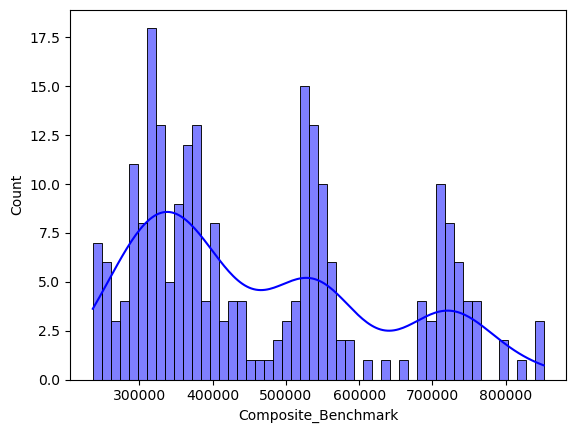

In [30]:
rateHousingDf

sns.histplot(rateHousingDf["Composite_Benchmark"], bins = 50, kde = True, color = "blue")
plt.show

X_train, X_test, y_train, y_test = train_test_split(rateHousingDf["VALUE"], rateHousingDf["Composite_Benchmark"], test_size=0.2, random_state=42, shuffle = True)
X_train = X_train.to_frame()
y_train = y_train.to_frame()

X_test = X_test.to_frame()
y_test = y_test.to_frame()

 

rateHousingModel = LinearRegression()
rateHousingModel.fit(X_train, y_train)

rateHousingPred = rateHousingModel.predict(X_test)
print(rateHousingPred)

print(len(X_train), len(y_train), len(X_test), len(y_test), len(rateHousingPred))

In [34]:
rateHousingIntercept = rateHousingModel.intercept_
print(rateHousingIntercept)

rateHousingSlope = rateHousingModel.coef_[0]
print(rateHousingSlope)


[447952.28750355]
[8358.41690705]


In [38]:
r2 = r2_score(y_test, rateHousingPred)
mse = mean_squared_error(y_test, rateHousingPred)
rmse = np.sqrt(mse)
 
print(f"R-squared: {r2:.4f}")
print(f"Mean squared error: {mse:.4f}")
print(f"Root mean squared error: {rmse:.4f}")

R-squared: 0.0046
Mean squared error: 26874795702.2464
Root mean squared error: 163935.3400


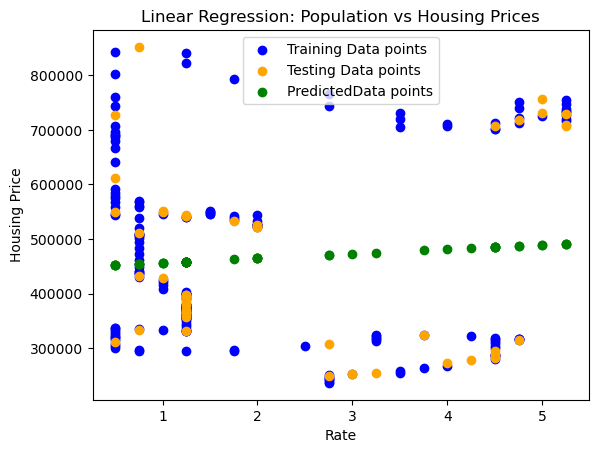

In [40]:
#plt.scatter(rateHousingDf["VALUE"], rateHousingDf["Composite_Benchmark"], color='blue', label='Original Data points')
plt.scatter(X_train, y_train, color='blue', label='Training Data points')
plt.scatter(X_test, y_test, color='orange', label='Testing Data points')
plt.scatter(X_test, rateHousingPred, color='green', label='PredictedData points')

plt.xlabel('Rate')
plt.ylabel('Housing Price')
plt.title('Linear Regression: Population vs Housing Prices')
plt.legend()
plt.show()

In [338]:
popHousingDf
#popHousingDf

,REF_DATE,GEO,VALUE,yearMonth,Composite_Benchmark
0,2005-01,Canada,320750110.0,2005-01,236400
1,2005-04,Canada,321405690.0,2005-04,243800
2,2005-07,Canada,322427320.0,2005-07,248400
3,2005-10,Canada,323533110.0,2005-10,253100
4,2006-01,Canada,323949090.0,2006-01,258600
...,...,...,...,...,...
75,2023-10,Canada,405137810.0,2023-10,727500
76,2024-01,Canada,407843560.0,2024-01,708700
77,2024-04,Canada,410383700.0,2024-04,734100
78,2024-07,Canada,412885990.0,2024-07,724800


In [46]:
popHousingDf

#sns.histplot(popHousingDf["value"], bins = 50, kde = True, color = "blue")
#plt.show

X_train, X_test, y_train, y_test = train_test_split(popHousingDf["VALUE"], popHousingDf["Composite_Benchmark"], test_size=0.2, random_state=42, shuffle = True)
X_train = X_train.to_frame()
y_train = y_train.to_frame()

X_test = X_test.to_frame()
y_test = y_test.to_frame()

 

popHousingModel = LinearRegression()
popHousingModel.fit(X_train, y_train)

popHousingPred = popHousingModel.predict(X_test)
print(popHousingPred)

print(len(X_train), len(y_train), len(X_test), len(y_test), len(popHousingPred))

[[390401.76661106]
 [232979.87329155]
 [348188.4695435 ]
 [397655.84294946]
 [325764.00728481]
 [378625.90034929]
 [281540.56173774]
 [642343.89633725]
 [252066.91628041]
 [291169.22665397]
 [490864.20240099]
 [404910.8739443 ]
 [613163.44974095]
 [420008.16898044]
 [620273.31328994]
 [465402.67965683]]
64 64 16 16 16


In [48]:
popHousingIntercept = popHousingModel.intercept_
print(popHousingIntercept)

popHousingSlope = popHousingModel.coef_[0]
print(rateHousingSlope)


[-1680808.62749688]
[8358.41690705]


In [50]:
r2 = r2_score(y_test, popHousingPred)
mse = mean_squared_error(y_test, popHousingPred)
rmse = np.sqrt(mse)
 
print(f"R-squared: {r2:.4f}")
print(f"Mean squared error: {mse:.4f}")
print(f"Root mean squared error: {rmse:.4f}")

R-squared: 0.8501
Mean squared error: 4641548625.4546
Root mean squared error: 68128.9118


In [57]:
immiHousingDf

X_train, X_test, y_train, y_test = train_test_split(immiHousingDf["VALUE"], immiHousingDf["Composite_Benchmark"], test_size=0.2, random_state=42, shuffle = True)
X_train = X_train.to_frame()
y_train = y_train.to_frame()

X_test = X_test.to_frame()
y_test = y_test.to_frame()

 

immiHousingModel = LinearRegression()
immiHousingModel.fit(X_train, y_train)

immiHousingPred = immiHousingModel.predict(X_test)
print(immiHousingPred)

print(len(X_train), len(y_train), len(X_test), len(y_test), len(immiHousingPred))

[[384342.70586789]
 [391075.90527386]
 [410236.25494841]
 [361360.46665232]]
15 15 4 4 4


In [59]:
immigHousingIntercept = immiHousingModel.intercept_
print(immigHousingIntercept)

immigHousingSlope = immiHousingModel.coef_[0]
print(immigHousingSlope)


[24662.31987704]
[1.4139436]


In [61]:
r2 = r2_score(y_test, immiHousingPred)
mse = mean_squared_error(y_test, immiHousingPred)
rmse = np.sqrt(mse)
 
print(f"R-squared: {r2:.4f}")
print(f"Mean squared error: {mse:.4f}")
print(f"Root mean squared error: {rmse:.4f}")

R-squared: -0.3963
Mean squared error: 9548715991.9607
Root mean squared error: 97717.5317
